In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from rigaku_smartlab.dataset import *
import xrayutilities as xu

## HR-XRD of AlGaN(0002) on SiC(0004)

Rx: 3.6689, Ry: 0.0925
Offset Angle: 3.6701, Azimuth Angle: 1.4446
Omega: 18.05, Two Theta: 36.10, Beta: 0.12


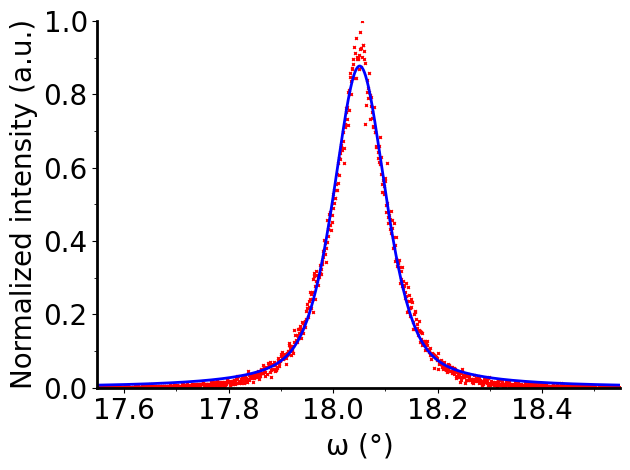

Rx: 3.6689, Ry: 0.0925
Offset Angle: 3.6701, Azimuth Angle: 1.4446
Omega: 17.80, Two Theta: 35.59, Beta: 0.01


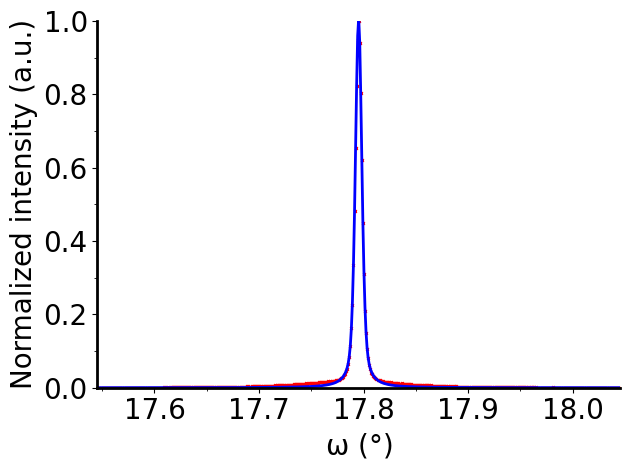

In [2]:
aln_on_silicon_carbide_fit = pseudo_voigt(
    '../data/raw/20250512_M3-1146C_AlN_0002.ras',
    normalized = True, verbose = True, plot = True,
)

aln_on_sic0004_fit = pseudo_voigt(
    '../data/raw/20250512_M3-1146B_SiC_0004.ras',
    normalized = True, verbose = True, plot = True,
)

## 0D RSM of AlN on SiC

Offset Angle: 4.15, Azimuth Angle: -179.52


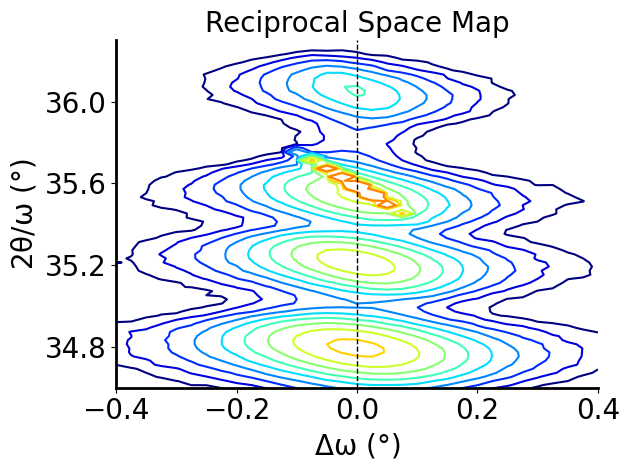

In [3]:
reciprocal_space_map(
    '../data/raw/20250424_M3-1140_RSM_AlN_0002a.ras',
    threshold = 100,  plot = 'contour', verbose = True,
    ylim = (34.6, 36.3)
)

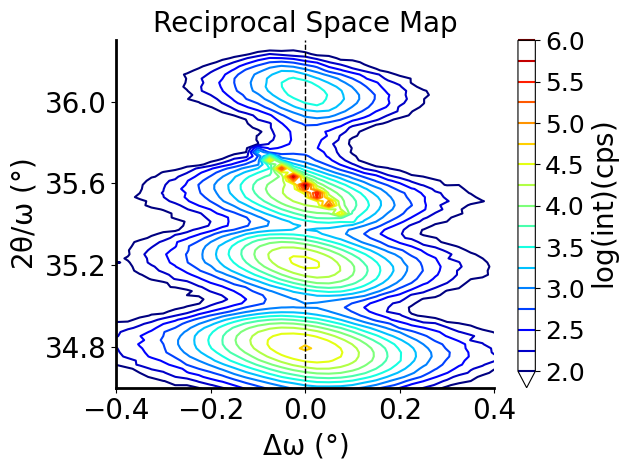

In [4]:
[omega, two_theta_omega], data = xu.io.getras_scan(
    '../data/raw/20250424_M3-1140_RSM_AlN_0002a.ras',
    None, 'Omega', 'TwoThetaOmega',
)

grid_angular = xu.Gridder2D(
    len(np.unique(omega)), 
    len(np.unique(two_theta_omega))
)
grid_angular(omega, two_theta_omega, data['int'])
intensity = xu.maplog(grid_angular.data.transpose(), 4, 0)

plt.figure()
cf = plt.contour(
    grid_angular.xaxis - grid_angular.xaxis.mean(), 
    grid_angular.yaxis, intensity, levels = 15, 
    cmap = 'jet', extend='min'
)

label_size = 20

# Set colorbar
cb = plt.colorbar(cf)
cb.set_label(r'$\mathrm{\log(int) (cps)}$', fontsize = label_size)
cb.ax.tick_params(labelsize=label_size - 2)

# Set axis labels
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel(r'$\mathrm{\Delta\omega\ (\degree)}$', fontsize=label_size)
plt.ylabel(r'$\mathrm{2\theta/\omega\ (\degree)}$', fontsize=label_size)
plt.title('Reciprocal Space Map', fontsize=label_size)

# Configure axis ticks and limits
ax = plt.gca()

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax.tick_params(axis='both', which='major', labelsize=label_size)
ax.tick_params(axis='both', which='minor', labelsize=label_size - 2)
ax.set_ylim(34.6, 36.3)

# Thicken only x and y-axis lines and remove the rest of the border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()